# Dogs Intakes EDA

#### Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px

#### Read in dataset

In [39]:
dogs = pd.read_csv('../data/intakes_clean.csv', parse_dates=['datetime'])

In [40]:
dogs = dogs[dogs['animal_type'] == 'Dog']

In [41]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71465 entries, 0 to 126142
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   animal_id         71465 non-null  object        
 1   name              59243 non-null  object        
 2   datetime          71465 non-null  datetime64[ns]
 3   intake_type       71465 non-null  object        
 4   intake_condition  71465 non-null  object        
 5   animal_type       71465 non-null  object        
 6   breed             71465 non-null  object        
 7   color             71465 non-null  object        
 8   found_address     35396 non-null  object        
 9   found_city        71465 non-null  object        
 10  spay_neuter       71464 non-null  object        
 11  sex               71464 non-null  object        
 12  age_in_years      71465 non-null  float64       
 13  mix_flag          71465 non-null  bool          
 14  breed_1           714

#### Intakes over time

In [42]:
dogs['intake_month'] = dogs['datetime'].dt.to_period('m')

In [43]:
dogs['month'] = dogs['datetime'].dt.month
dogs['year'] = dogs['datetime'].dt.year

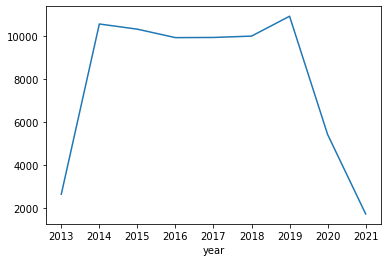

In [44]:
dogs.groupby('year')['animal_id'].count().plot(kind='line');

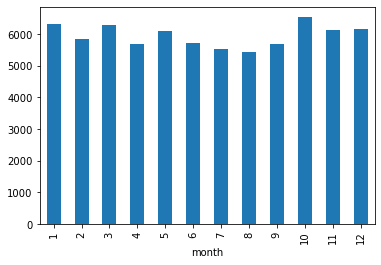

In [45]:
dogs.groupby('month')['animal_id'].count().plot(kind='bar');

#### Intakes by Breed

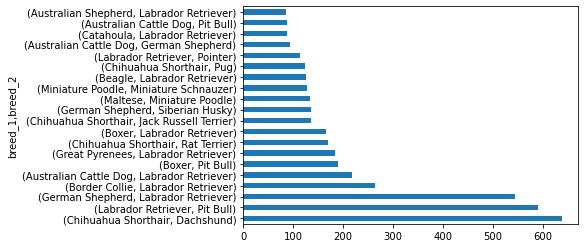

In [52]:
dogs.groupby(['breed_1', 'breed_2'])['animal_id'].count().sort_values(ascending=False).head(20).plot(kind='barh')

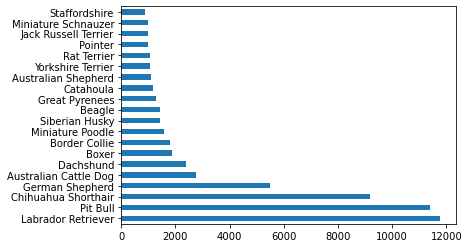

In [63]:
# Most common component of breed
pd.concat([dogs['breed_1'], dogs['breed_2']]).value_counts().head(20).plot(kind='barh')

In [15]:
dogs['mix_flag'].value_counts(normalize=True)

True     0.852417
False    0.147583
Name: mix_flag, dtype: float64

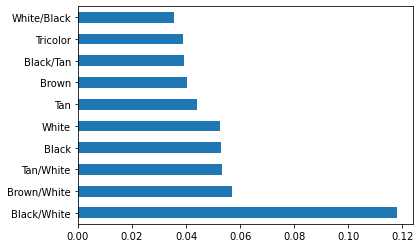

In [19]:
dogs['color'].value_counts(normalize=True).head(10).plot(kind='barh')

In [22]:
dogs['intake_type'].value_counts(normalize=True)

Stray                 0.695949
Owner Surrender       0.211698
Public Assist         0.087218
Abandoned             0.002589
Euthanasia Request    0.002547
Name: intake_type, dtype: float64

In [29]:
dogs['sex'].value_counts(normalize=True)

Male       0.535263
Female     0.458329
Unknown    0.006409
Name: sex, dtype: float64

In [28]:
dogs['spay_neuter'].value_counts(normalize=True)

Intact      0.629576
Neutered    0.199877
Spayed      0.164139
Unknown     0.006409
Name: spay_neuter, dtype: float64

In [30]:
dogs['intake_condition'].value_counts(normalize=True)

Normal      0.907157
Injured     0.043028
Sick        0.024152
Nursing     0.016652
Aged        0.005233
Other       0.001777
Medical     0.000812
Pregnant    0.000784
Behavior    0.000280
Feral       0.000126
Name: intake_condition, dtype: float64

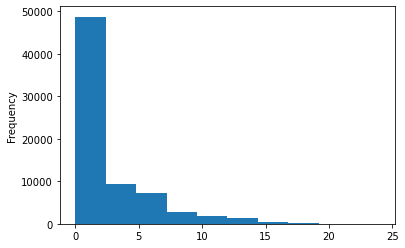

In [55]:
dogs['age_in_years'].plot(kind='hist');

Labrador Retriever              11765
Pit Bull                        11412
Chihuahua Shorthair              9163
German Shepherd                  5481
Australian Cattle Dog            2756
                                ...  
Wolf Hybrid                         1
Grand Basset Griffon Vendeen        1
Sealyham Terr                       1
Dutch Sheepdog                      1
Eng Toy Spaniel                     1
Length: 208, dtype: int64